In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
import missingno as msno

%matplotlib inline
warnings.filterwarnings("ignore")

## **Reading Data and Selecting The Variables**


In [2]:
working_directory = "\\".join(os.getcwd().split("\\")[:-1])
DATASETS = os.path.join(working_directory, "data")
RAW_PATH = os.path.join(DATASETS, "raw")
parquet_name = os.path.join(RAW_PATH, "bfrss2018.parquet")

In [3]:
df = pd.read_parquet(parquet_name)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437436 entries, 0 to 437435
Columns: 275 entries, _STATE to _AIDTST3
dtypes: float64(269), object(6)
memory usage: 917.8+ MB


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_MAM5022,_RFPAP34,_RFPSA22,_RFBLDS3,_COL10YR,_HFOB3YR,_FS5YR,_FOBTFS,_CRCREC,_AIDTST3
0,1.0,1.0,01052018,01,05,2018,1100.0,2018000001,2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,1.0,1.0,01122018,01,12,2018,1100.0,2018000002,2.018000e+09,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1.0,1.0,01082018,01,08,2018,1100.0,2018000003,2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1.0,1.0,01032018,01,03,2018,1100.0,2018000004,2.018000e+09,1.0,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,1.0,1.0,01122018,01,12,2018,1100.0,2018000005,2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [4]:
df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_MAM5022', '_RFPAP34', '_RFPSA22', '_RFBLDS3', '_COL10YR', '_HFOB3YR',
       '_FS5YR', '_FOBTFS', '_CRCREC', '_AIDTST3'],
      dtype='object', length=275)

In [5]:
columns = ["GENHLTH",       # categorical
           "PHYSHLTH",      # numerical
           "SEX1",      # categorical
           "MENTHLTH",      # numerical
           "MEDCOST",      # categorical
           "CHECKUP1",      # categorical
            "EXERANY2",
            "SLEPTIM1",     #numerical
            "CVDINFR4",
            "CVDCRHD4",
            "CVDSTRK3",
            "ADDEPEV2",
            "CHCKDNY1",
            "HAVARTH3",
            "DIABETE3",
            "MARITAL",
            "EDUCA",
            "RENTHOM1",
            "EMPLOY1",
            "PREGNANT",
            "DIFFWALK",
            "DIFFDRES",
            "HADSIGM3",
            "SMOKDAY2",
            "ECIGNOW",
            "COPDBRTH",
            "CSRVTRT2",
            "CIMEMLOS",
            
           
           
            "STOPSMK2",
            "SOMALE",
            "MSCODE",
            "_MENT14D",
            "_AGE_G",
            "_CHLDCNT",
            "_EDUCAG",
        
            "_IMPRACE",
            "_RFBMI5",
            "_TOTINDA",
            "_SMOKER3",
            "DRNKANY5",
            "_AGE65YR"]

# _AGE_G  YAŞ kolonu olarak kullanılacak

In [6]:
df = df[columns]

**Looking for Missing Values and Handling Them**


Since missing values are very few compared to the size of the data, there is no problem in deleting them.


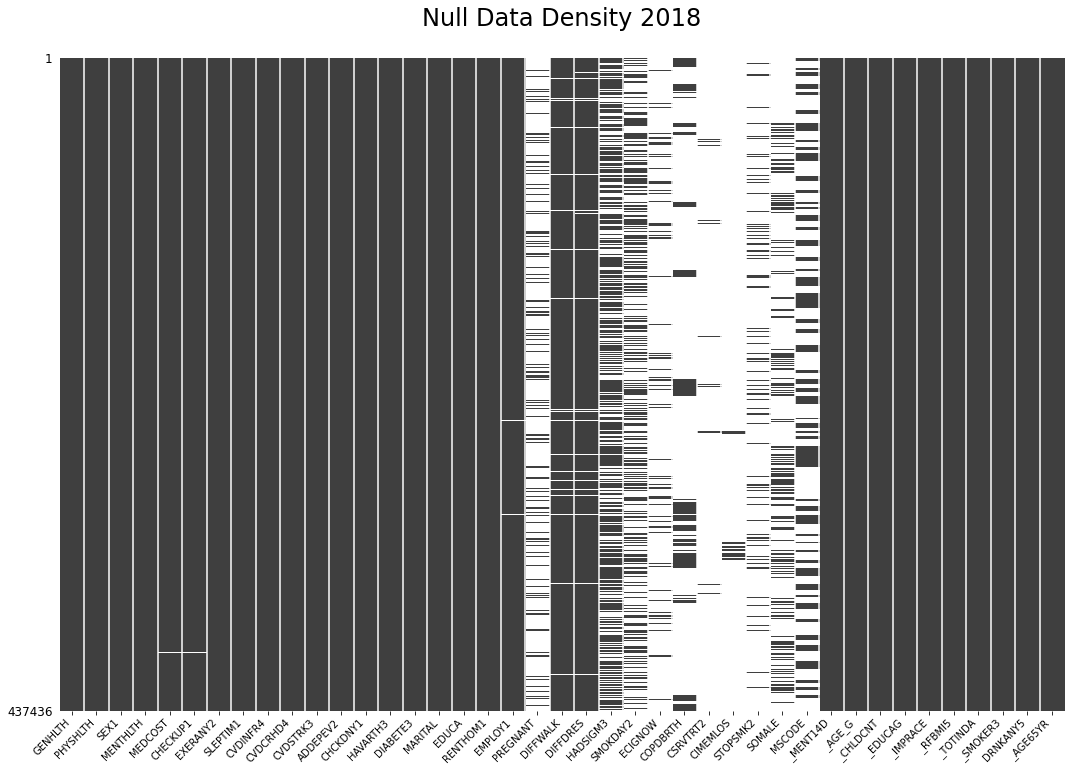

In [7]:
# Visualize null data density
msno.matrix(df, figsize=(18,12), sparkline=False, fontsize=10)

# Set the title
plt.title('Null Data Density 2018', fontsize=24, y=1.04)

# Move the x-axis tick labels below the graph by adjusting the layout
ax = plt.gca()
ax.xaxis.tick_bottom()

# Set custom tick positions and labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=45, ha='right')

# Save the figure
plt.savefig(r"..\graphs\EDA\2018\null-data-density-2018.png", facecolor="white", bbox_inches = "tight",pad_inches=0.3)

# Show the plot
plt.show()

In [8]:
# Set the threshold for null values
threshold = 0.05  # Adjust as needed

# Calculate the number of non-null values required for a column to be retained
min_non_nulls = int((1 - threshold) * len(df))

# Drop columns based on the threshold
df = df.dropna(axis=1, thresh=min_non_nulls)

In [9]:
# Set the threshold for null values
threshold = 0.05 # Adjust as needed


# Calculate the number of non-null values required for a row to be retained
min_non_nulls = int((1 - threshold) * len(df.columns))

# Drop rows based on the threshold
df = df.dropna(axis=0, thresh=min_non_nulls)

In [10]:
df

,GENHLTH,PHYSHLTH,SEX1,MENTHLTH,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,...,_MENT14D,_AGE_G,_CHLDCNT,_EDUCAG,_IMPRACE,_RFBMI5,_TOTINDA,_SMOKER3,DRNKANY5,_AGE65YR
0,2.0,30.0,2.0,88.0,2.0,1.0,2.0,7.0,2.0,2.0,...,1.0,6.0,1.0,4.0,1.0,1.0,2.0,4.0,2.0,2.0
1,3.0,88.0,2.0,88.0,1.0,2.0,1.0,5.0,2.0,2.0,...,1.0,2.0,3.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0
2,5.0,10.0,2.0,88.0,2.0,1.0,1.0,7.0,2.0,2.0,...,1.0,6.0,1.0,2.0,1.0,2.0,1.0,4.0,2.0,2.0
3,1.0,88.0,1.0,88.0,2.0,1.0,1.0,6.0,2.0,2.0,...,1.0,6.0,1.0,2.0,1.0,2.0,1.0,4.0,2.0,2.0
4,2.0,88.0,2.0,88.0,2.0,1.0,2.0,7.0,2.0,2.0,...,1.0,3.0,3.0,4.0,1.0,9.0,2.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437431,1.0,88.0,2.0,30.0,2.0,1.0,1.0,8.0,2.0,2.0,...,3.0,6.0,1.0,3.0,5.0,1.0,1.0,4.0,2.0,2.0
437432,1.0,88.0,2.0,88.0,2.0,2.0,1.0,8.0,2.0,2.0,...,1.0,6.0,1.0,4.0,5.0,9.0,1.0,4.0,2.0,2.0
437433,5.0,30.0,2.0,88.0,2.0,2.0,2.0,3.0,2.0,2.0,...,1.0,6.0,1.0,1.0,5.0,2.0,2.0,3.0,2.0,2.0
437434,4.0,88.0,2.0,2.0,2.0,1.0,1.0,5.0,2.0,2.0,...,2.0,6.0,1.0,4.0,5.0,2.0,1.0,1.0,1.0,2.0


In [11]:
df.dropna(inplace=True)

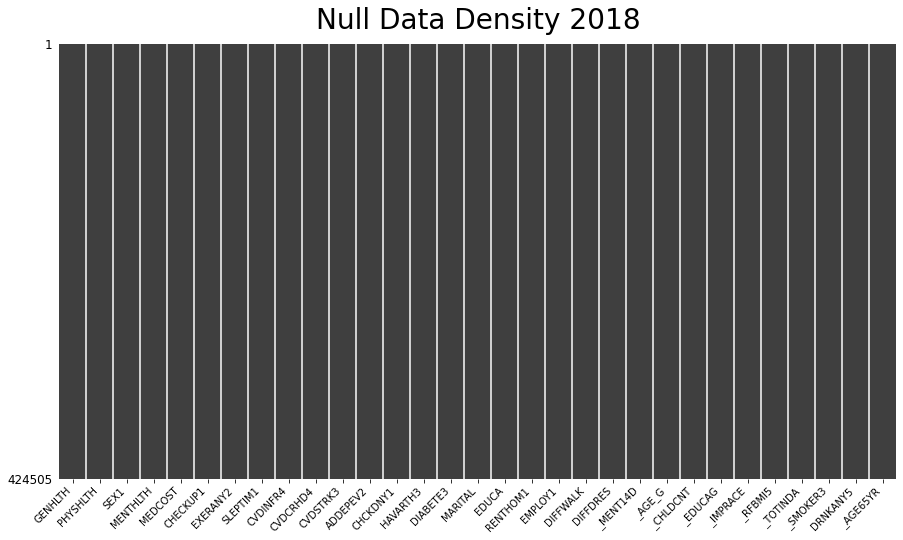

In [12]:
# Visualize null data density
msno.matrix(df, figsize=(15, 8), sparkline=False, fontsize=10)

# Set the title
plt.title('Null Data Density 2018', fontsize=28, y=1.02)

# Move the x-axis tick labels below the graph by adjusting the layout
ax = plt.gca()
ax.xaxis.tick_bottom()

# Set custom tick positions and labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=45, ha='right')

# Show the plot
plt.show()

In [13]:
df

,GENHLTH,PHYSHLTH,SEX1,MENTHLTH,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,...,_MENT14D,_AGE_G,_CHLDCNT,_EDUCAG,_IMPRACE,_RFBMI5,_TOTINDA,_SMOKER3,DRNKANY5,_AGE65YR
0,2.0,30.0,2.0,88.0,2.0,1.0,2.0,7.0,2.0,2.0,...,1.0,6.0,1.0,4.0,1.0,1.0,2.0,4.0,2.0,2.0
1,3.0,88.0,2.0,88.0,1.0,2.0,1.0,5.0,2.0,2.0,...,1.0,2.0,3.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0
2,5.0,10.0,2.0,88.0,2.0,1.0,1.0,7.0,2.0,2.0,...,1.0,6.0,1.0,2.0,1.0,2.0,1.0,4.0,2.0,2.0
3,1.0,88.0,1.0,88.0,2.0,1.0,1.0,6.0,2.0,2.0,...,1.0,6.0,1.0,2.0,1.0,2.0,1.0,4.0,2.0,2.0
4,2.0,88.0,2.0,88.0,2.0,1.0,2.0,7.0,2.0,2.0,...,1.0,3.0,3.0,4.0,1.0,9.0,2.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437431,1.0,88.0,2.0,30.0,2.0,1.0,1.0,8.0,2.0,2.0,...,3.0,6.0,1.0,3.0,5.0,1.0,1.0,4.0,2.0,2.0
437432,1.0,88.0,2.0,88.0,2.0,2.0,1.0,8.0,2.0,2.0,...,1.0,6.0,1.0,4.0,5.0,9.0,1.0,4.0,2.0,2.0
437433,5.0,30.0,2.0,88.0,2.0,2.0,2.0,3.0,2.0,2.0,...,1.0,6.0,1.0,1.0,5.0,2.0,2.0,3.0,2.0,2.0
437434,4.0,88.0,2.0,2.0,2.0,1.0,1.0,5.0,2.0,2.0,...,2.0,6.0,1.0,4.0,5.0,2.0,1.0,1.0,1.0,2.0


In [14]:
df.isnull().sum().sum()

0

In [15]:
df.columns

Index(['GENHLTH', 'PHYSHLTH', 'SEX1', 'MENTHLTH', 'MEDCOST', 'CHECKUP1',
       'EXERANY2', 'SLEPTIM1', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ADDEPEV2',
       'CHCKDNY1', 'HAVARTH3', 'DIABETE3', 'MARITAL', 'EDUCA', 'RENTHOM1',
       'EMPLOY1', 'DIFFWALK', 'DIFFDRES', '_MENT14D', '_AGE_G', '_CHLDCNT',
       '_EDUCAG', '_IMPRACE', '_RFBMI5', '_TOTINDA', '_SMOKER3', 'DRNKANY5',
       '_AGE65YR'],
      dtype='object')

In [16]:
# Define a dictionary with column names and their desired data types
dtype_mapping = {
    'GENHLTH': 'object',
    'MEDCOST': "object",
    'PHYSHLTH': 'float64',
    'MENTHLTH': 'float64',
    'CHECKUP1': 'object',
    'EXERANY2': 'object',
    'SLEPTIM1': 'float64',  # Assuming it's a numeric column
    'CVDINFR4': 'object',
    'CVDCRHD4': 'object',
    'CVDSTRK3': 'object',   
    'DIABETE3': 'object',
    'MARITAL': 'object',
    'EDUCA': 'object',
    'RENTHOM1': 'object',
    'EMPLOY1': 'object',
    'DIFFWALK': 'object',
    '_MENT14D': 'object',
    '_AGE_G': 'object',
    '_CHLDCNT': 'object',
    '_EDUCAG': 'object',
    'SEX1': 'object',
    '_IMPRACE': 'object',
    '_RFBMI5': 'object',
    '_TOTINDA': 'object',
    '_SMOKER3': 'object',
    'DRNKANY5': 'object',
}

# Convert the data types of the specified columns
df = df.astype(dtype_mapping)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424505 entries, 0 to 437435
Data columns (total 31 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   GENHLTH   424505 non-null  object 
 1   PHYSHLTH  424505 non-null  float64
 2   SEX1      424505 non-null  object 
 3   MENTHLTH  424505 non-null  float64
 4   MEDCOST   424505 non-null  object 
 5   CHECKUP1  424505 non-null  object 
 6   EXERANY2  424505 non-null  object 
 7   SLEPTIM1  424505 non-null  float64
 8   CVDINFR4  424505 non-null  object 
 9   CVDCRHD4  424505 non-null  object 
 10  CVDSTRK3  424505 non-null  object 
 11  ADDEPEV2  424505 non-null  float64
 12  CHCKDNY1  424505 non-null  float64
 13  HAVARTH3  424505 non-null  float64
 14  DIABETE3  424505 non-null  object 
 15  MARITAL   424505 non-null  object 
 16  EDUCA     424505 non-null  object 
 17  RENTHOM1  424505 non-null  object 
 18  EMPLOY1   424505 non-null  object 
 19  DIFFWALK  424505 non-null  object 
 20  DIFFDRES 

In [18]:
df.columns

Index(['GENHLTH', 'PHYSHLTH', 'SEX1', 'MENTHLTH', 'MEDCOST', 'CHECKUP1',
       'EXERANY2', 'SLEPTIM1', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ADDEPEV2',
       'CHCKDNY1', 'HAVARTH3', 'DIABETE3', 'MARITAL', 'EDUCA', 'RENTHOM1',
       'EMPLOY1', 'DIFFWALK', 'DIFFDRES', '_MENT14D', '_AGE_G', '_CHLDCNT',
       '_EDUCAG', '_IMPRACE', '_RFBMI5', '_TOTINDA', '_SMOKER3', 'DRNKANY5',
       '_AGE65YR'],
      dtype='object')

In [19]:
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame
# Replace df with your actual DataFrame name

# Specify the target column
target_column = 'CVDCRHD4'

# Identify object-type columns excluding the target column
object_columns = df.select_dtypes(include=['object']).columns
object_columns = object_columns[object_columns != target_column]

# Create an empty dictionary to store the results
chi2_results = {
    'Variable': [],
    '2018-Chi2_Statistic': [],
    '2018-P_Value': [],
    '2018-Degrees_of_Freedom': [],
}

# Perform chi-square test for each object-type column
for column in object_columns:
    contingency_table = pd.crosstab(df[target_column], df[column])
    
    # Perform the chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Store the results in the dictionary
    chi2_results['Variable'].append(column)
    chi2_results['2018-Chi2_Statistic'].append(chi2_stat)
    chi2_results['2018-P_Value'].append(p_value)
    chi2_results['2018-Degrees_of_Freedom'].append(dof)

# Convert the dictionary to a DataFrame
chi2_results_df = pd.DataFrame(chi2_results)

# Display the DataFrame
chi2_results_df


,Variable,2018-Chi2_Statistic,2018-P_Value,2018-Degrees_of_Freedom
0,GENHLTH,28105.738513,0.000000e+00,18
1,SEX1,5560.934343,0.000000e+00,9
2,MEDCOST,5850.067561,0.000000e+00,9
3,CHECKUP1,11335.923141,0.000000e+00,18
4,EXERANY2,10896.088637,0.000000e+00,9
5,CVDINFR4,329123.309172,0.000000e+00,9
6,CVDSTRK3,258700.540342,0.000000e+00,9
7,DIABETE3,188746.002629,0.000000e+00,15
8,MARITAL,8126.167381,0.000000e+00,18
9,EDUCA,4946.676972,0.000000e+00,18


In [20]:
output_path = r"..\outputs\\2018\\"
chi2_results_df.to_csv(output_path + "chi2_results.csv")


In [21]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

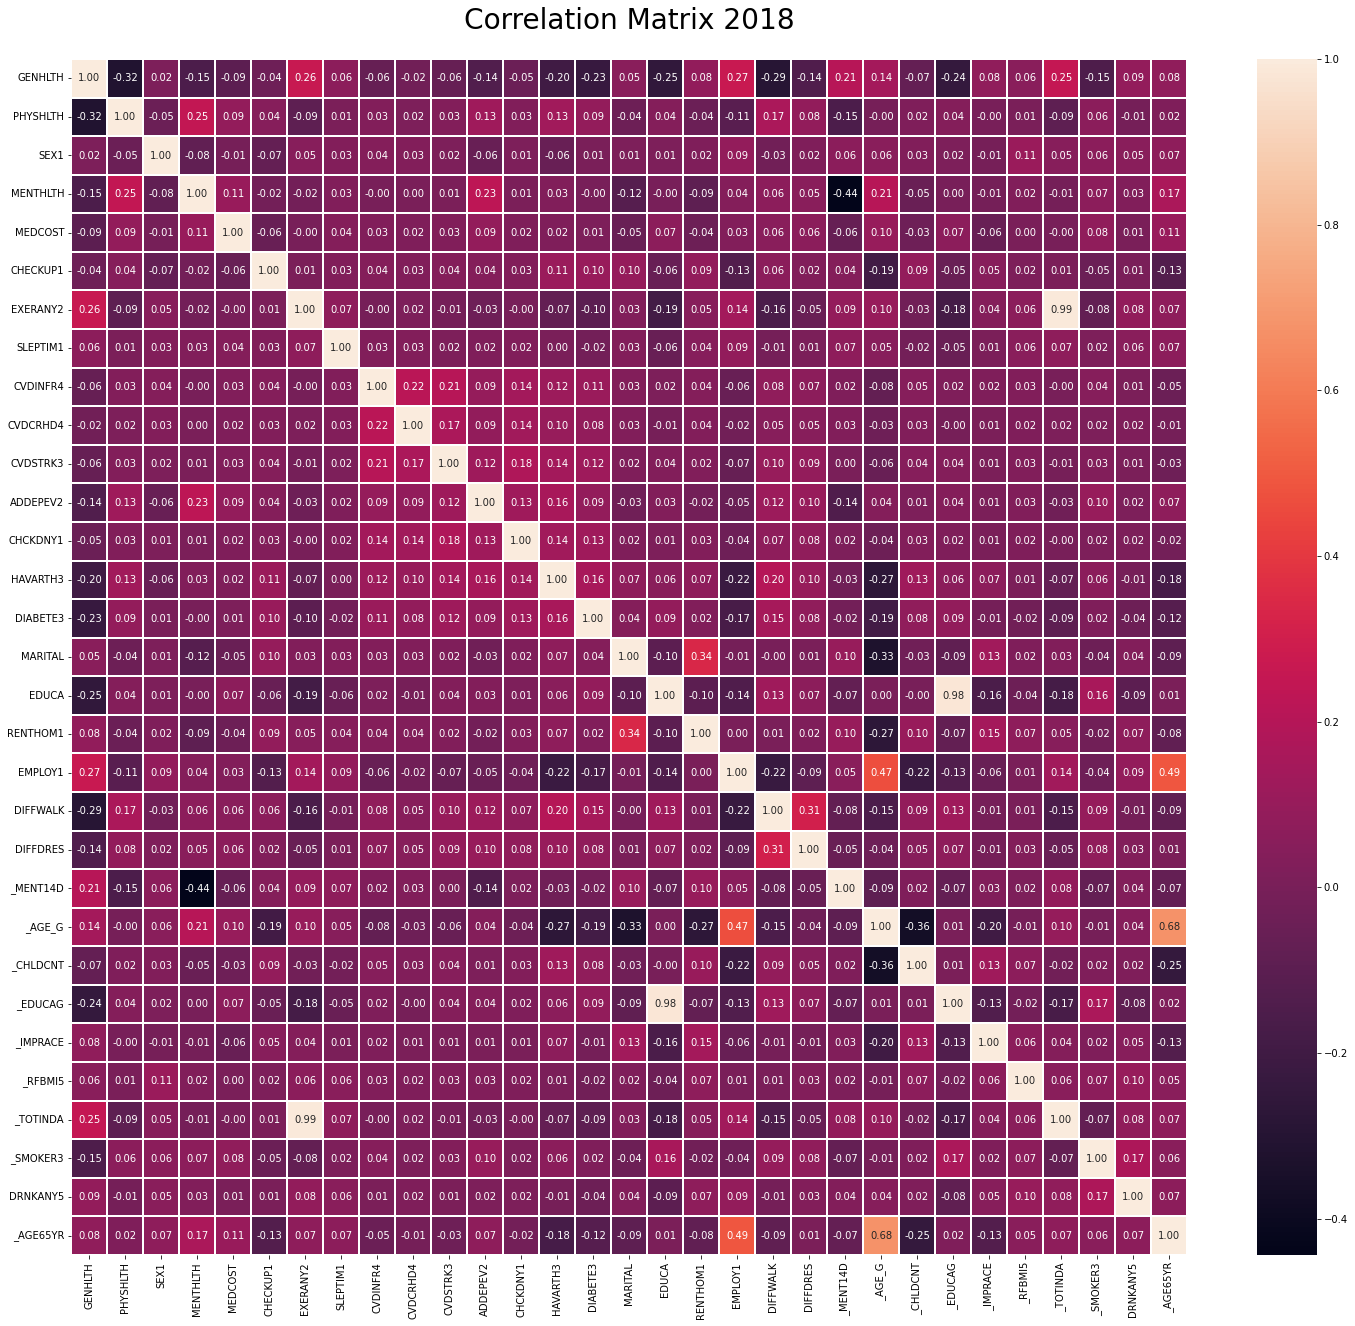

In [22]:

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(25, 22))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.3)
plt.title('Correlation Matrix 2018', fontsize = 28 , y=1.02)
plt.savefig(r"..\graphs\EDA\2018\\" + "corr-heatmap-2018.png", facecolor = "white", bbox_inches = "tight", pad_inches = 0.5)
plt.show()

In [23]:
import pandas as pd

# Assuming df is your DataFrame
# Replace df with your actual DataFrame name

# Specify the target column
target_column = 'CVDCRHD4'

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract correlations with respect to the target column (excluding the target column itself)
correlation_with_target = correlation_matrix[target_column].drop(target_column).sort_values(ascending=False)

# Create a DataFrame to store the results
correlation_results_df = pd.DataFrame({
    'Feature': correlation_with_target.index,
    '2018-Correlation_with_Target': correlation_with_target.values
})

# Display the correlation table
correlation_results_df



,Feature,2018-Correlation_with_Target
0,CVDINFR4,0.220917
1,CVDSTRK3,0.166362
2,CHCKDNY1,0.136782
3,HAVARTH3,0.099811
4,ADDEPEV2,0.085418
5,DIABETE3,0.084053
6,DIFFDRES,0.049740
7,DIFFWALK,0.048169
8,RENTHOM1,0.035417
9,SLEPTIM1,0.033128


In [24]:
output_path = r"..\outputs\2018\\"
correlation_results_df.to_csv(output_path + "correlation_results.csv")



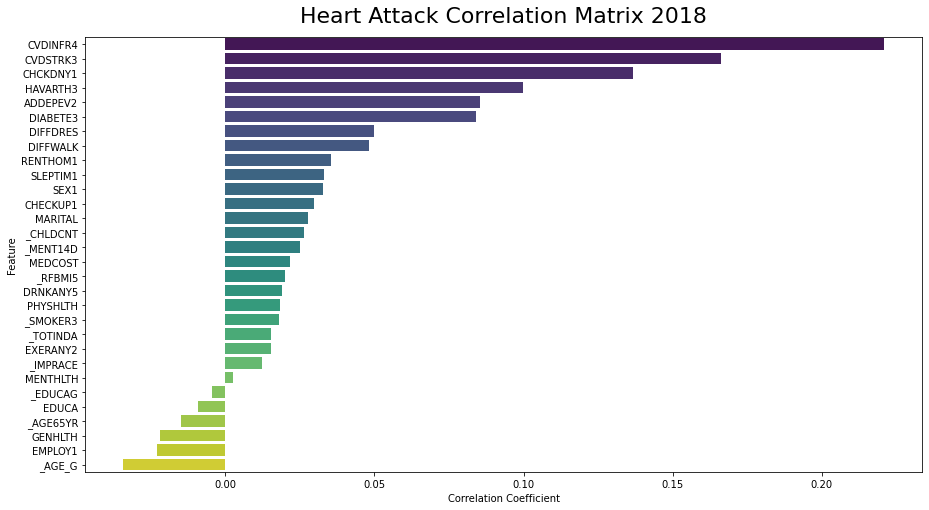

In [25]:
# Plot the correlations
plt.figure(figsize=(15, 8))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="viridis")
plt.title('Heart Attack Correlation Matrix 2018', fontsize = 22 , y=1.02)
plt.savefig(r"..\graphs\EDA\2018\\" + "heart-attack-corr-matrix-2018.png", facecolor = "white", bbox_inches = "tight", pad_inches = 0.3)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()